#Iris Flowers Classification

##PROBLEM STATEMENT

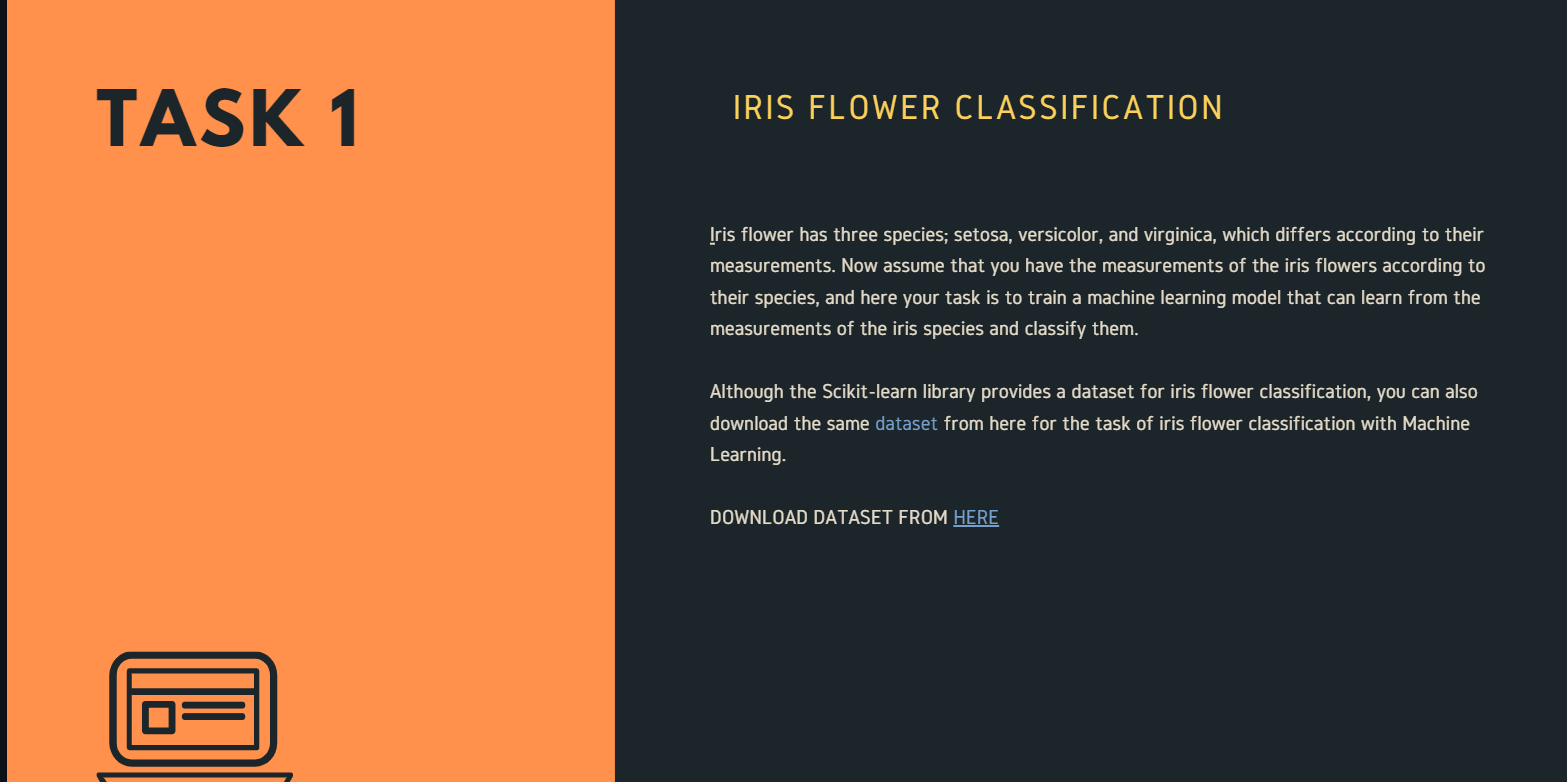

##INTRODUCTION
Every machine learning project begins by understanding what the data and drawing the objectives. While applying machine learning algorithms to your data set, you are understanding, building and analyzing the data as to get the end result.

Following are the steps involved in creating a well-defined ML project:

1] Understand and define the problem

2] Prepare the data

3] Explore and Analyse the data

4] Apply the algorithms

5] Reduce the errors

6] Predict the result

#Data Preparation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')

import warnings
warnings.filterwarnings('ignore')

In [24]:
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
iris = pd.read_csv('/content/iris.data', names = columns)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
iris.shape

(150, 5)

In [29]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

#Data Preprocessing

In [30]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [31]:
iris.duplicated().sum()

3

In [32]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [33]:
# Dropping Duplicated Values
iris = iris.drop_duplicates()

In [34]:
# Checking For Duplicated Values
iris.duplicated().any()

False

In [35]:
iris.reset_index(drop=True,inplace=True)

In [36]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [38]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Visualization

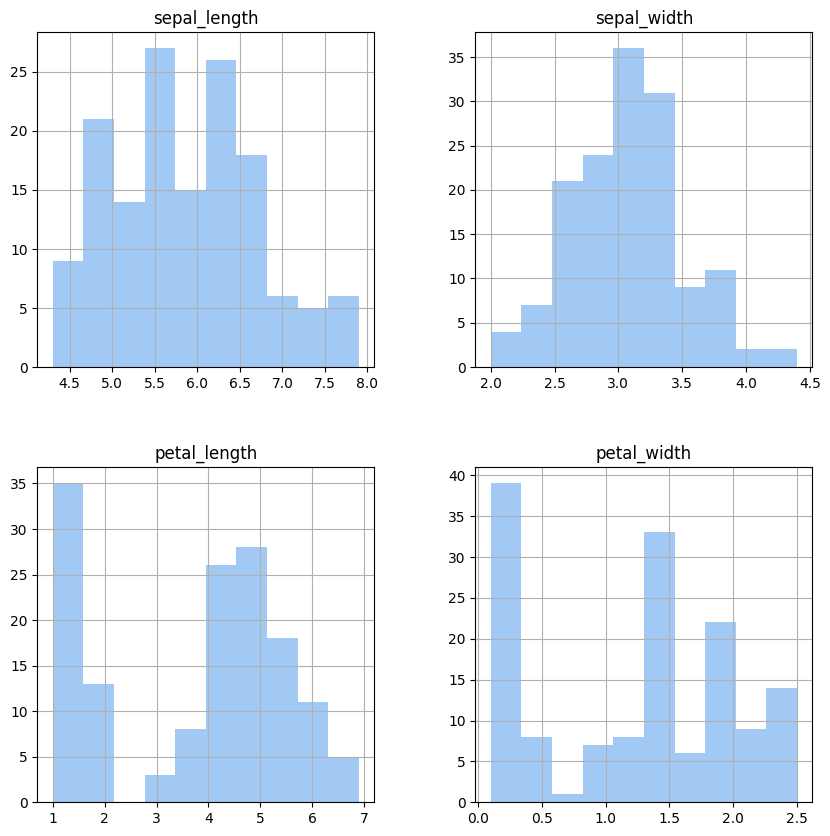

In [39]:
iris.hist(figsize=(10,10))
plt.show()

In [40]:
iris['class'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

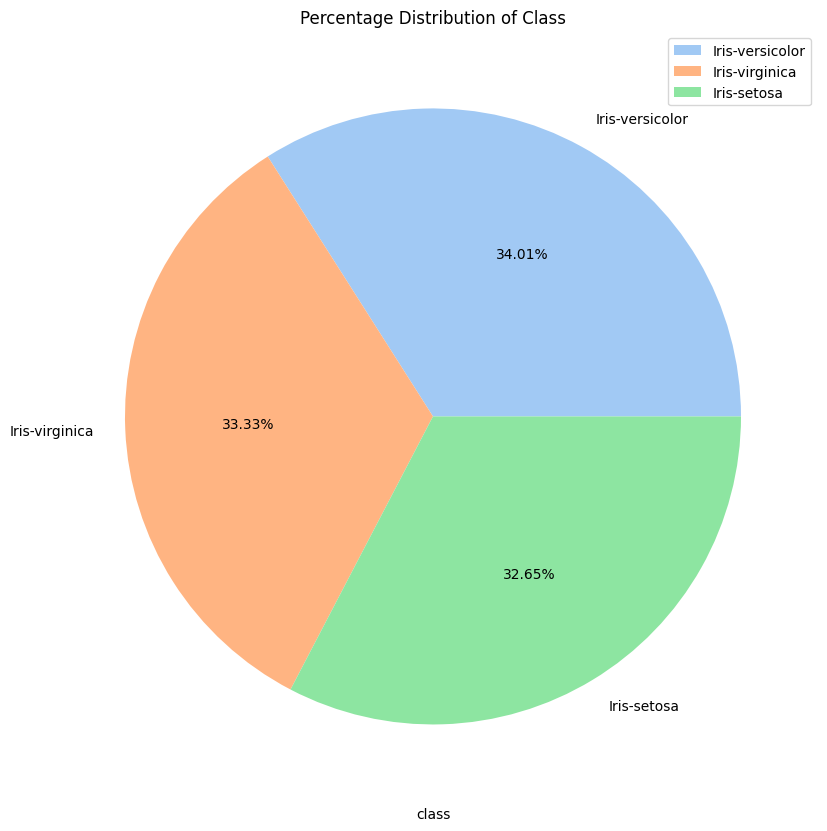

In [41]:
# Finding Percentage Distribution of Class
plt.figure(figsize=(20,10))
iris['class'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage Distribution of Class')
plt.legend(iris['class'].value_counts().index)
plt.xlabel('class')
plt.ylabel(None)
plt.show()

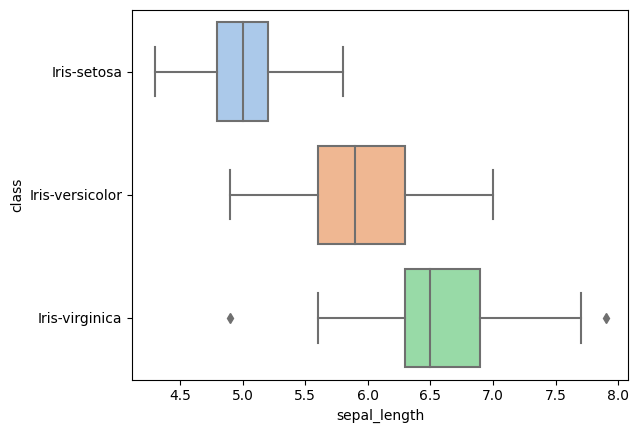

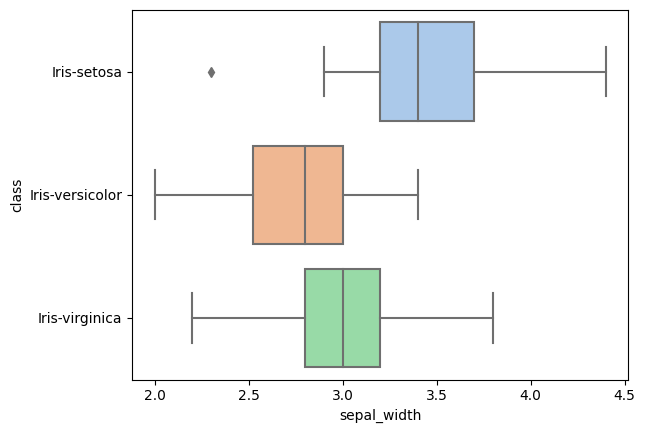

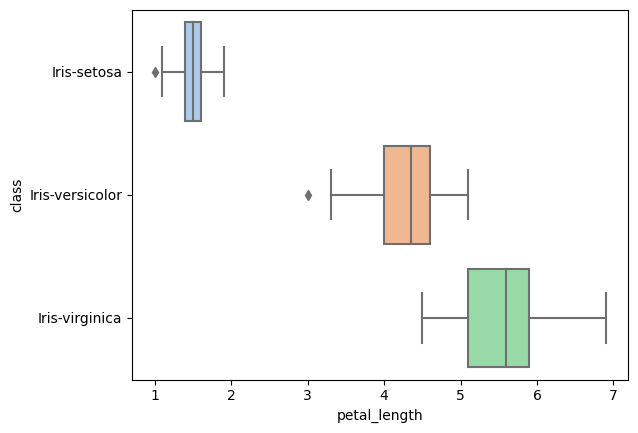

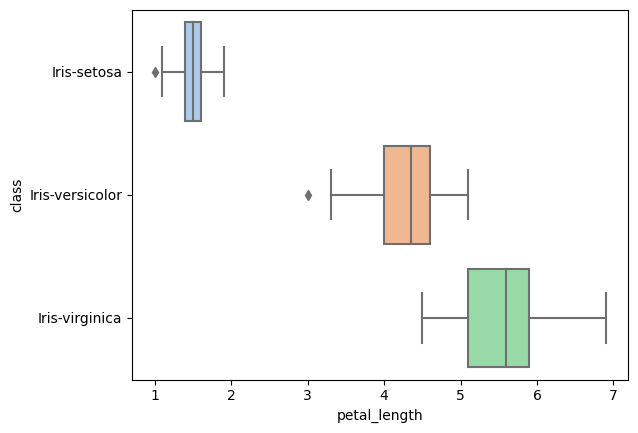

In [42]:
# Showing BoxPlot for all the Numerical Columns
sns.boxplot(data = iris , x='sepal_length', y='class')
plt.show()
sns.boxplot(data=iris, x='sepal_width', y='class')
plt.show()
sns.boxplot(data = iris , x='petal_length', y='class')
plt.show()
sns.boxplot(data = iris , x='petal_length', y='class')
plt.show()

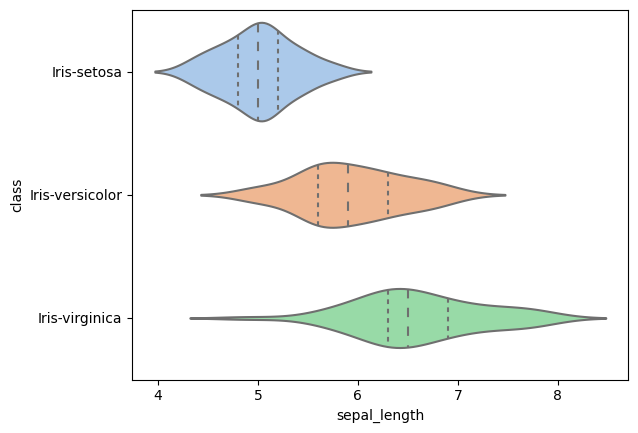

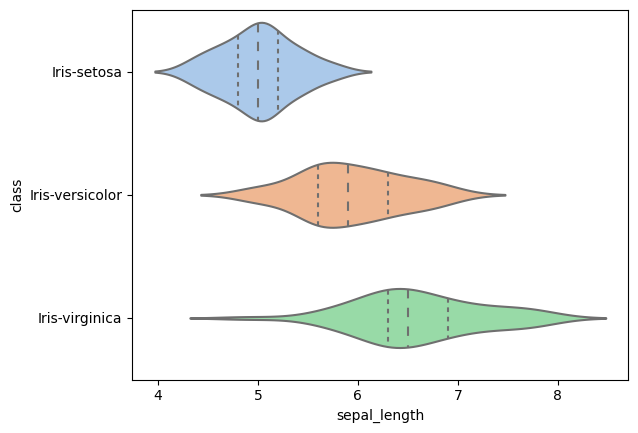

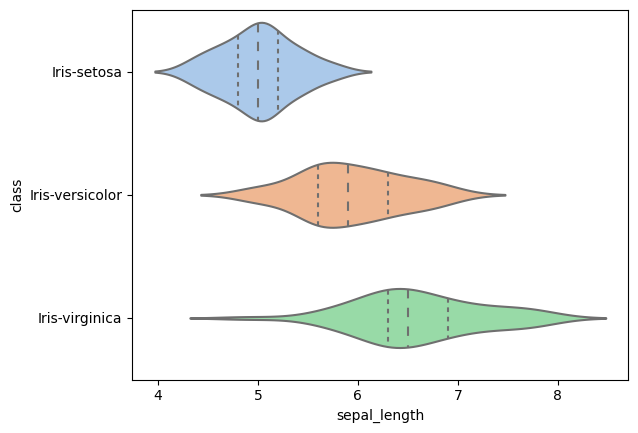

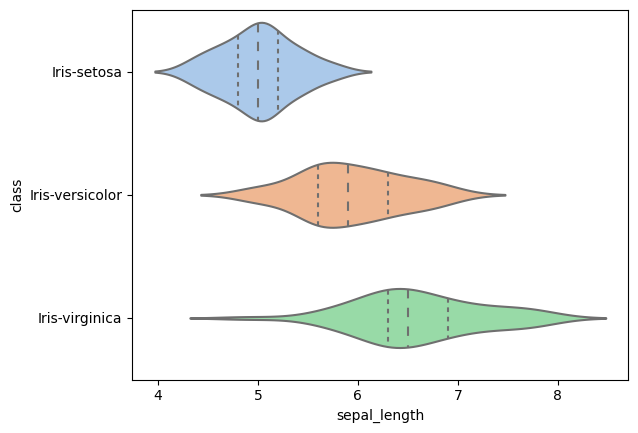

In [43]:
g = sns.violinplot(y='class', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepal_length', data=iris, inner='quartile')
plt.show()

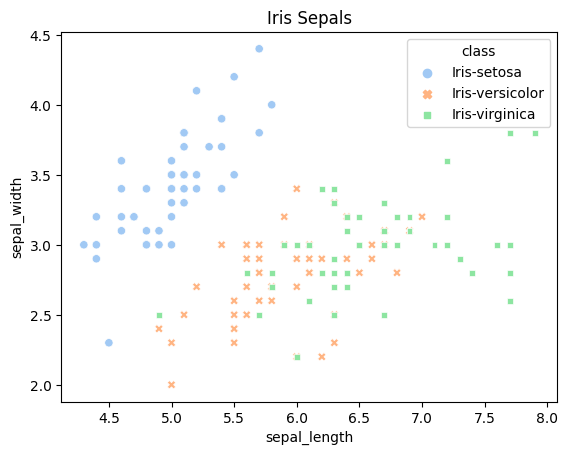

In [44]:
# Showing Relationship Between Sepal_Length and Sepal_Width on the basis of Class
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='class', style='class')
plt.title('Iris Sepals')
plt.show()

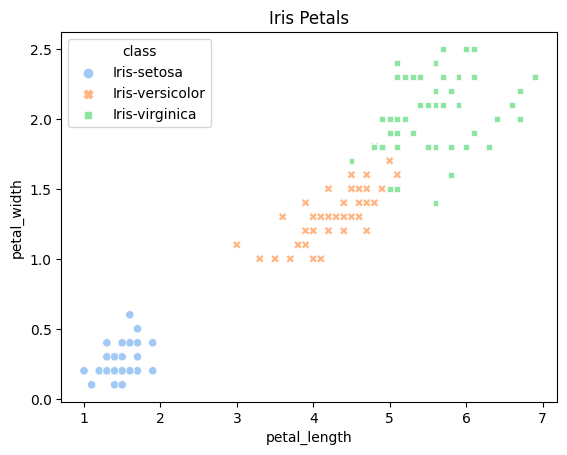

In [45]:
# Showing Relationship Between Petal_Length and Petal_Width on the basis of Class
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='class', style='class')
plt.title('Iris Petals')
plt.show()

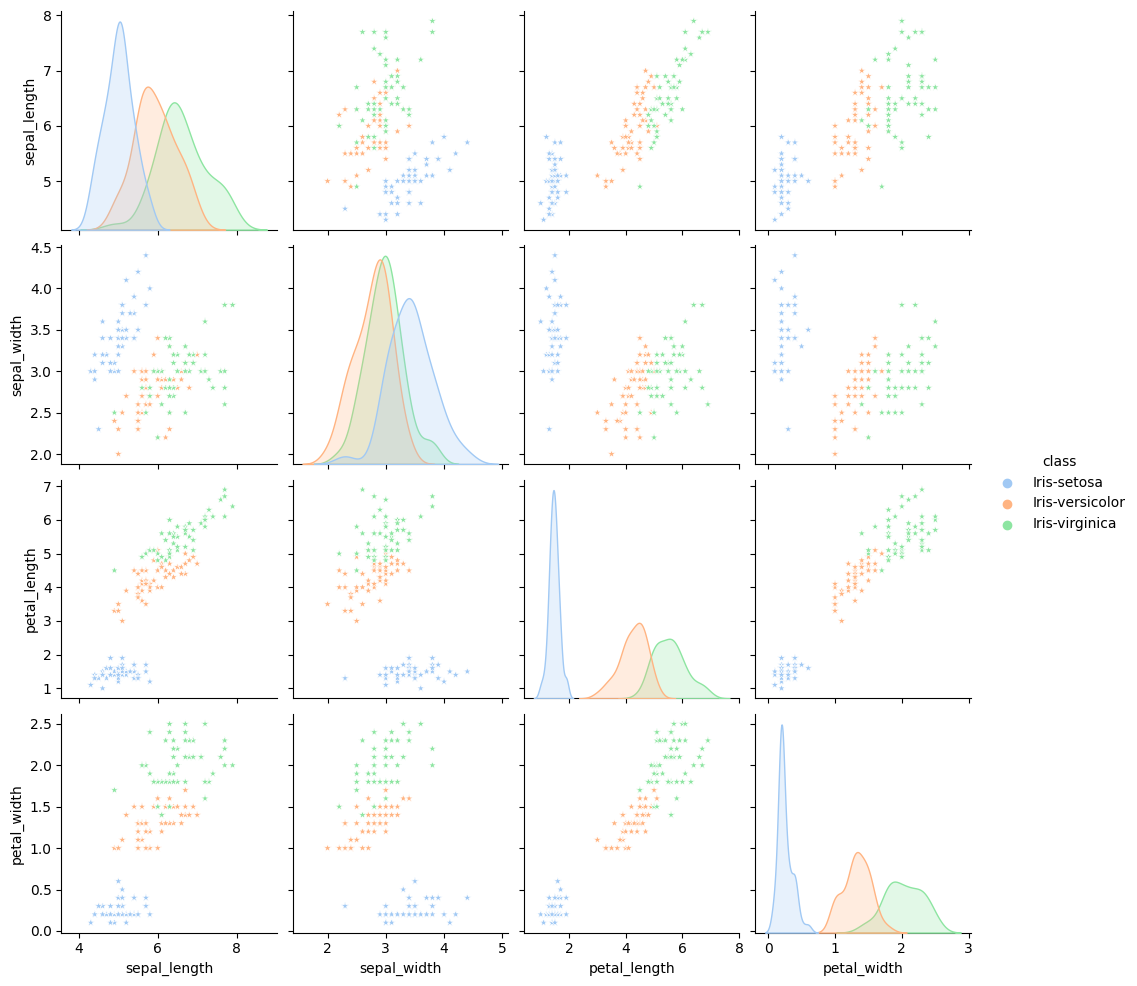

In [46]:
# Showing PairPlot
sns.pairplot(iris,hue='class',markers='*')

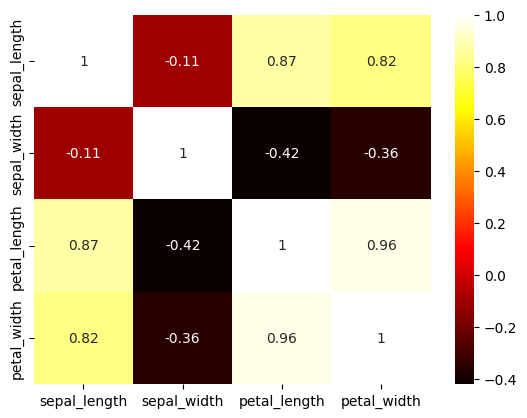

In [47]:
# Showing Correlation Plot
corr = iris.corr()
sns.heatmap(corr,annot=True,cmap='hot')
plt.show()

#Data Encoding

In [48]:
sns.set_palette('Set1')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [49]:
le = LabelEncoder()

In [50]:
iris['class'] = le.fit_transform(iris['class'])
iris['class'].unique()

array([0, 1, 2])

In [51]:
x = iris.drop(['class'],axis=1)
y = iris['class']

#Splitting the Data into Training Data and Testing Data

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(117, 4)
(30, 4)
(117,)
(30,)


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [55]:
# Support Vector Machine's
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
accuracy is 0.9666666666666667


In [56]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.85      1.00      0.92        11
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]]
accuracy is 0.9333333333333333


In [57]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]
accuracy is 0.9333333333333333


In [58]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46         9
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        10

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

[[ 9  0  0]
 [11  0  0]
 [10  0  0]]
accuracy is 0.3


In [59]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.00      0.00      0.00        11
           2       0.48      1.00      0.65        10

    accuracy                           0.63        30
   macro avg       0.49      0.67      0.55        30
weighted avg       0.46      0.63      0.52        30

[[ 9  0  0]
 [ 0  0 11]
 [ 0  0 10]]
accuracy is 0.6333333333333333


In [60]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    SVC(),
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),
                  ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)

    print("="*30)

SVC
****Results****
Accuracy: 96.6667%
GaussianNB
****Results****
Accuracy: 93.3333%
MultinomialNB
****Results****
Accuracy: 93.3333%
BernoulliNB
****Results****
Accuracy: 30.0000%
ComplementNB
****Results****
Accuracy: 63.3333%


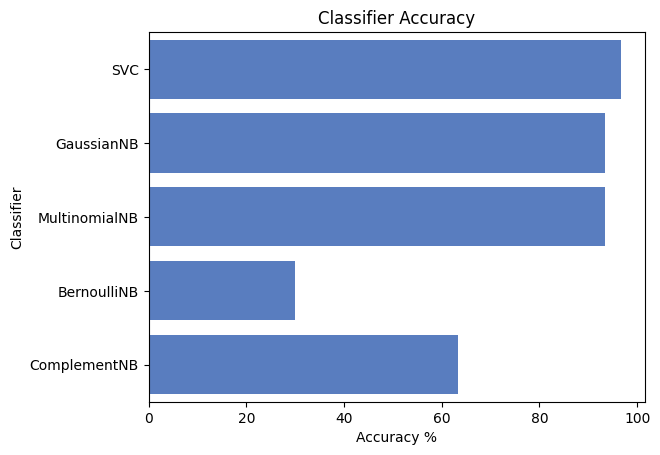

In [61]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

#Conclusion

Iris Classification Dataset is very simple nd Basic Dataset which contains the data about various features of Iris Flowers . This classification can be done by many classification algorithms in machine learning but in this Project, we used SVM, ComplementNB, BernoulliNB, MultinomialNB and GaussianNB Model. Overall the result after training and testing the SVC Model we get 96 % Accuracy. which shows the model that we built is perfectly accurate.